# Annotated RDM plots

Some advanced manipulations on your RDM plots

In [1]:
import matplotlib.pyplot as plt
import numpy
from rsatoolbox.rdm.rdms import RDMs
from rsatoolbox.vis.rdm_plot import show_rdm

In [2]:
dissim_utv = 0.25+(0.5*numpy.random.rand(5, 36)) ## 9x9 rdm
mask = numpy.zeros([36], dtype=bool)
mask[[11, 12, 13, 18, 19]] = True
#dissim_utv[0, mask] = 0

make a dummy rdms object

In [3]:
rdms = RDMs(
    dissimilarities=dissim_utv,
    dissimilarity_measure='random',
)

basic multi plot

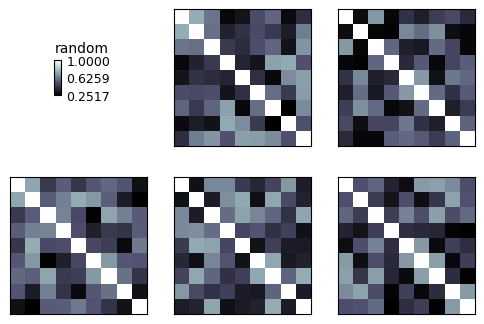

In [4]:
show_rdm(rdms, vmin=0, vmax=1, show_colorbar='figure')
plt.show()

With overlay (array arg, default color green transparency)

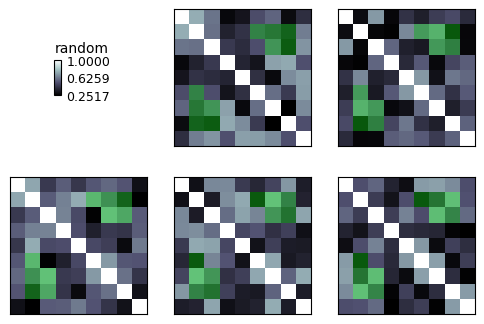

In [5]:
show_rdm(rdms, vmin=0, vmax=1, show_colorbar='figure', overlay=mask)
plt.show()

With overlay (rdm_descriptor)

In [6]:
show_rdm(rdms, vmin=0, vmax=1, show_colorbar='figure', overlay=('name', 'mask'))
plt.show()

KeyError: 'name'

With contour (array arg)

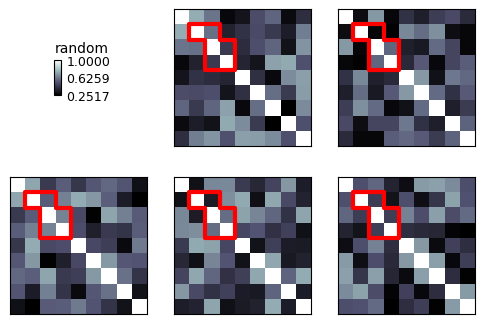

In [7]:
show_rdm(rdms, vmin=0, vmax=1, show_colorbar='figure', contour=mask)
plt.show()

With contour (rdm descriptor)

In [ ]:
show_rdm(rdms, vmin=0, vmax=1, show_colorbar='figure', contour=('name', 'mask'))
plt.show()

You can also build the plot in Object-Oriented fashion:

In [ ]:
from rsatoolbox.vis.rdm_plot import MultiRdmPlot
fig = MultiRdmPlot(rdms)
fig.contour_from_rdm('name', 'myContour')
fig.overlay = numpy.array(abc)
fig.plot()